In [184]:
import pandas as pd

In [185]:
file_path = "Data_Science_Job_Salaries.csv"
data = pd.read_csv(file_path)

In [186]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


<h2> Data Cleaning </h2>

In [188]:
data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [189]:
# data['salary_in_usd'].fillna(data['salary_in_usd'].median(),inplace=True)
data['salary_in_usd'].fillna(data['salary_in_usd'].median())

# data['company_size'].fillna('Unknown', inplace=True)
data['company_size'].fillna('Unknown')


0      L
1      S
2      M
3      S
4      L
      ..
602    M
603    M
604    M
605    M
606    L
Name: company_size, Length: 607, dtype: object

In [190]:
# Drop rows with critical missing data

data.dropna(subset=['job_title', 'experience_level'],inplace=True)
# data.dropna(subset=['job_title', 'experience_level'])


In [191]:
# Verify no missing values remain
print(data.isnull().sum())

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


<h4> Standardize Categorical Columns <p>
 Ensure consistent formatting for categorical data.</h4>

In [192]:
# Standardize text case for categorical columns
data['job_title'] = data['job_title'].str.lower()
data['company_size'] = data['company_size'].str.capitalize()
 

In [193]:
# Verify unique values
print(data['job_title'].unique())


['data scientist' 'machine learning scientist' 'big data engineer'
 'product data analyst' 'machine learning engineer' 'data analyst'
 'lead data scientist' 'business data analyst' 'lead data engineer'
 'lead data analyst' 'data engineer' 'data science consultant'
 'bi data analyst' 'director of data science' 'research scientist'
 'machine learning manager' 'data engineering manager'
 'machine learning infrastructure engineer' 'ml engineer' 'ai scientist'
 'computer vision engineer' 'principal data scientist'
 'data science manager' 'head of data' '3d computer vision researcher'
 'data analytics engineer' 'applied data scientist'
 'marketing data analyst' 'cloud data engineer' 'financial data analyst'
 'computer vision software engineer' 'director of data engineering'
 'data science engineer' 'principal data engineer'
 'machine learning developer' 'applied machine learning scientist'
 'data analytics manager' 'head of data science' 'data specialist'
 'data architect' 'finance data anal

In [194]:
print(data['company_size'].unique())


['L' 'S' 'M']


<h2> Feature Engineering </h2>

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [196]:
data['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [197]:
 # Encode categorical variables
data['employment_type'] = data['employment_type'].map({'PT': 0,'FT': 1, 'CT': 2, 'FL': 3})
 


In [198]:
data['experience_level'].unique()


array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [199]:
data['experience_level'] = data['experience_level'].map({'EN':0, 'MI': 1, 'SE': 2, 'EX': 3})


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    int64 
 3   employment_type     607 non-null    int64 
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(7), object(5)
memory usage: 57.0+ KB


In [201]:
 # Add a salary ratio feature
data['salary_ratio'] = data['salary'] / data['salary_in_usd']
 

In [202]:
# Group salaries by company size
grouped_salary = data.groupby('company_size')['salary_in_usd'].mean()
print(grouped_salary)


company_size
L    119242.994949
M    116905.466258
S     77632.674699
Name: salary_in_usd, dtype: float64


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          607 non-null    int64  
 1   work_year           607 non-null    int64  
 2   experience_level    607 non-null    int64  
 3   employment_type     607 non-null    int64  
 4   job_title           607 non-null    object 
 5   salary              607 non-null    int64  
 6   salary_currency     607 non-null    object 
 7   salary_in_usd       607 non-null    int64  
 8   employee_residence  607 non-null    object 
 9   remote_ratio        607 non-null    int64  
 10  company_location    607 non-null    object 
 11  company_size        607 non-null    object 
 12  salary_ratio        607 non-null    float64
dtypes: float64(1), int64(7), object(5)
memory usage: 61.8+ KB


In [204]:
data['job_title'].unique()


array(['data scientist', 'machine learning scientist',
       'big data engineer', 'product data analyst',
       'machine learning engineer', 'data analyst', 'lead data scientist',
       'business data analyst', 'lead data engineer', 'lead data analyst',
       'data engineer', 'data science consultant', 'bi data analyst',
       'director of data science', 'research scientist',
       'machine learning manager', 'data engineering manager',
       'machine learning infrastructure engineer', 'ml engineer',
       'ai scientist', 'computer vision engineer',
       'principal data scientist', 'data science manager', 'head of data',
       '3d computer vision researcher', 'data analytics engineer',
       'applied data scientist', 'marketing data analyst',
       'cloud data engineer', 'financial data analyst',
       'computer vision software engineer',
       'director of data engineering', 'data science engineer',
       'principal data engineer', 'machine learning developer',
       

In [205]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
data['job_title'] = label_encoder.fit_transform(data['job_title'])


In [206]:
data['job_title'].unique()


array([22, 40,  7, 47, 37, 12, 34,  8, 33, 32, 17, 19,  5, 25, 48, 39, 18,
       38, 42,  1, 10, 46, 21, 29,  0, 13,  3, 41,  9, 28, 11, 24, 20, 45,
       36,  4, 15, 30, 23, 16, 27, 44,  6, 49,  2, 26, 31, 43, 35, 14])

In [207]:
data['salary_currency'].unique()


array(['EUR', 'USD', 'GBP', 'HUF', 'INR', 'JPY', 'CNY', 'MXN', 'CAD',
       'DKK', 'PLN', 'SGD', 'CLP', 'BRL', 'TRY', 'AUD', 'CHF'],
      dtype=object)

In [208]:
# data['salary_currency_encoded'] = label_encoder.fit_transform(data['salary_currency'])
# data['salary_currency'] = data['salary_currency'].map({'EN':0, 'MI': 1, 'SE': 2, 'EX': 3})

currency_mapping = {
    'EUR': 0, 'USD': 1, 'GBP': 2, 'HUF': 3, 'INR': 4, 'JPY': 5, 
    'CNY': 6, 'MXN': 7, 'CAD': 8, 'DKK': 9, 'PLN': 10, 'SGD': 11,
    'CLP': 12, 'BRL': 13, 'TRY': 14, 'AUD': 15, 'CHF': 16
}

data['salary_currency'] = data['salary_currency'].map(currency_mapping)



In [209]:
data['salary_currency'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          607 non-null    int64  
 1   work_year           607 non-null    int64  
 2   experience_level    607 non-null    int64  
 3   employment_type     607 non-null    int64  
 4   job_title           607 non-null    int32  
 5   salary              607 non-null    int64  
 6   salary_currency     607 non-null    int64  
 7   salary_in_usd       607 non-null    int64  
 8   employee_residence  607 non-null    object 
 9   remote_ratio        607 non-null    int64  
 10  company_location    607 non-null    object 
 11  company_size        607 non-null    object 
 12  salary_ratio        607 non-null    float64
dtypes: float64(1), int32(1), int64(8), object(3)
memory usage: 59.4+ KB


In [211]:
data['employee_residence'].unique()


array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [212]:
data['employee_residence'] = label_encoder.fit_transform(data['employee_residence'])

In [213]:
data['employee_residence'].unique()


array([14, 32, 20, 23, 55, 25, 41, 19, 27, 43, 44, 46, 11, 21,  0, 40, 37,
        8,  2, 39, 42, 18, 15, 49, 30, 24,  5, 50,  7, 28, 56,  4, 54, 36,
       10, 47, 29, 12, 35, 33, 51, 22, 53, 48, 45, 34, 31, 13,  1, 16, 52,
       38, 17,  3,  6, 26,  9])

In [214]:
data['company_location'].unique()


array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [215]:
data['company_location'] = label_encoder.fit_transform(data['company_location'])

In [216]:
data['company_location'].unique()


array([12, 29, 18, 20, 48, 22, 38, 17, 25, 39,  9, 19,  0, 37, 34,  6,  2,
       36, 16, 41, 13, 28, 21, 31, 40, 44, 42, 26,  5,  4, 47, 24, 43, 33,
        8, 27, 10, 32, 30, 45,  7, 49,  1, 46, 11, 14, 15, 35,  3, 23])

In [217]:
data['company_size'].unique()


array(['L', 'S', 'M'], dtype=object)

In [218]:
# Mapping for 'company_size'
size_mapping = {'S': 0, 'M': 1, 'L': 2}

# Apply mapping to 'company_size'
data['company_size'] = data['company_size'].map(size_mapping)


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          607 non-null    int64  
 1   work_year           607 non-null    int64  
 2   experience_level    607 non-null    int64  
 3   employment_type     607 non-null    int64  
 4   job_title           607 non-null    int32  
 5   salary              607 non-null    int64  
 6   salary_currency     607 non-null    int64  
 7   salary_in_usd       607 non-null    int64  
 8   employee_residence  607 non-null    int32  
 9   remote_ratio        607 non-null    int64  
 10  company_location    607 non-null    int32  
 11  company_size        607 non-null    int64  
 12  salary_ratio        607 non-null    float64
dtypes: float64(1), int32(3), int64(9)
memory usage: 54.7 KB


<h1>Exploratory Data Analysis (EDA)</h1>

Summary Statistics
<p>
Analyze salary distribution and other numeric columns.

In [220]:
# Summary statistics
print(data.describe())

       Unnamed: 0    work_year  experience_level  employment_type   job_title  \
count  607.000000   607.000000        607.000000       607.000000  607.000000   
mean   303.000000  2021.405272          1.401977         1.004942   20.960461   
std    175.370085     0.692133          0.785510         0.226121   10.491317   
min      0.000000  2020.000000          0.000000         0.000000    0.000000   
25%    151.500000  2021.000000          1.000000         1.000000   13.000000   
50%    303.000000  2022.000000          2.000000         1.000000   17.000000   
75%    454.500000  2022.000000          2.000000         1.000000   22.000000   
max    606.000000  2022.000000          3.000000         3.000000   49.000000   

             salary  salary_currency  salary_in_usd  employee_residence  \
count  6.070000e+02       607.000000     607.000000          607.000000   
mean   3.240001e+05         1.616145  112297.869852           40.408567   
std    1.544357e+06         2.339065   70957.

In [221]:
 # Analyze salary distribution
import matplotlib.pyplot as plt
import seaborn as sns

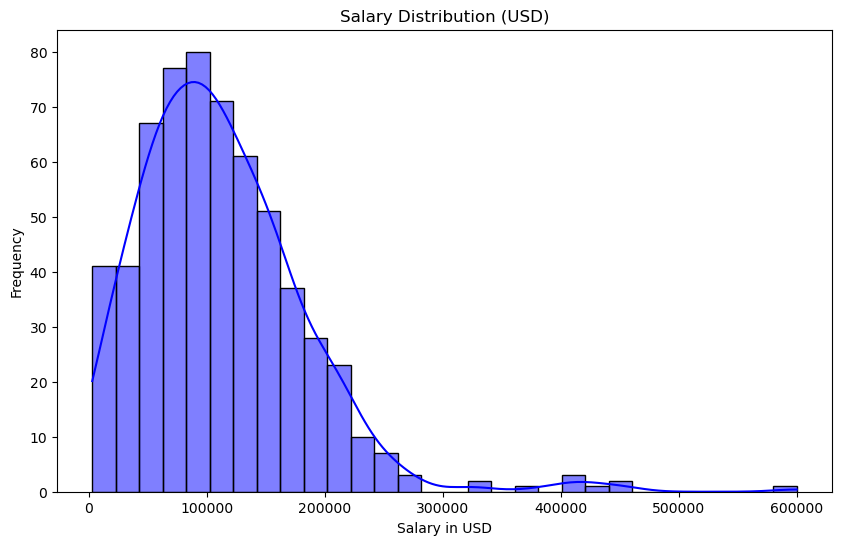

In [222]:
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], bins=30, kde=True,color='blue')
plt.title('Salary Distribution (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

 Correlation Analysis <p>
 Understand relationships between numeric features.

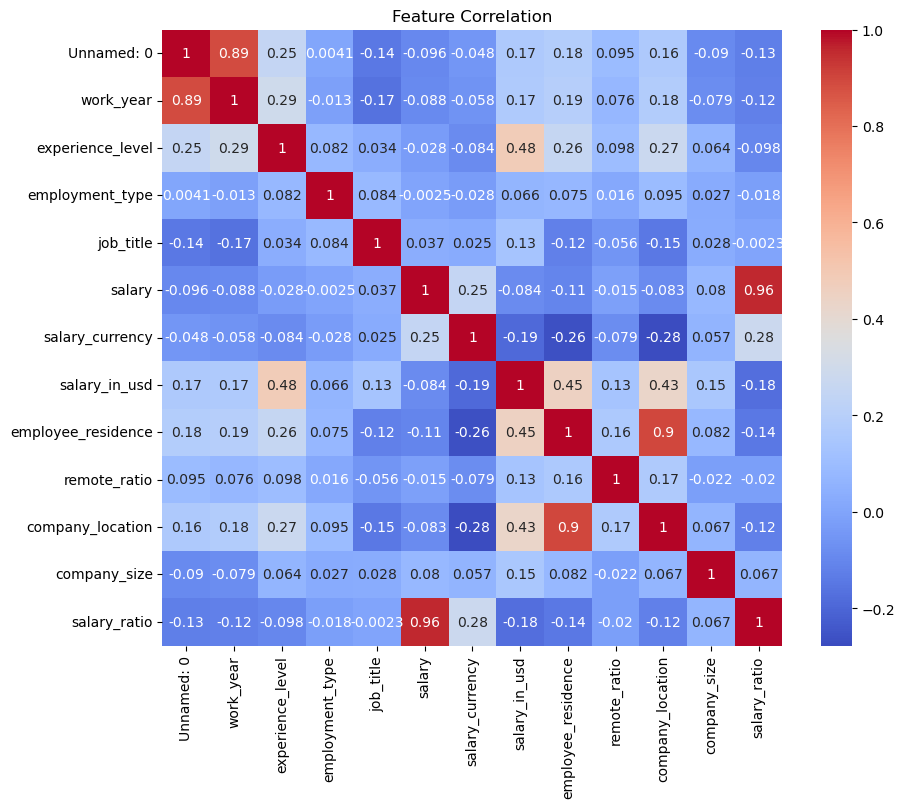

In [223]:
 # Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

 Category-Based Analysis <p>
 Examine salaries by job_title, experience_level, and remote_ratio.

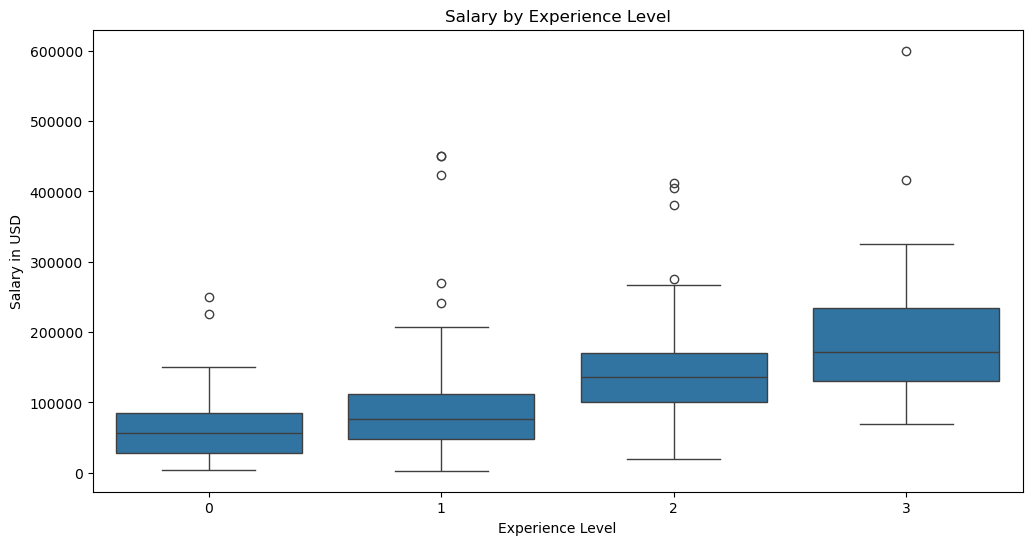

In [224]:
# Boxplot for salaries by experience level
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

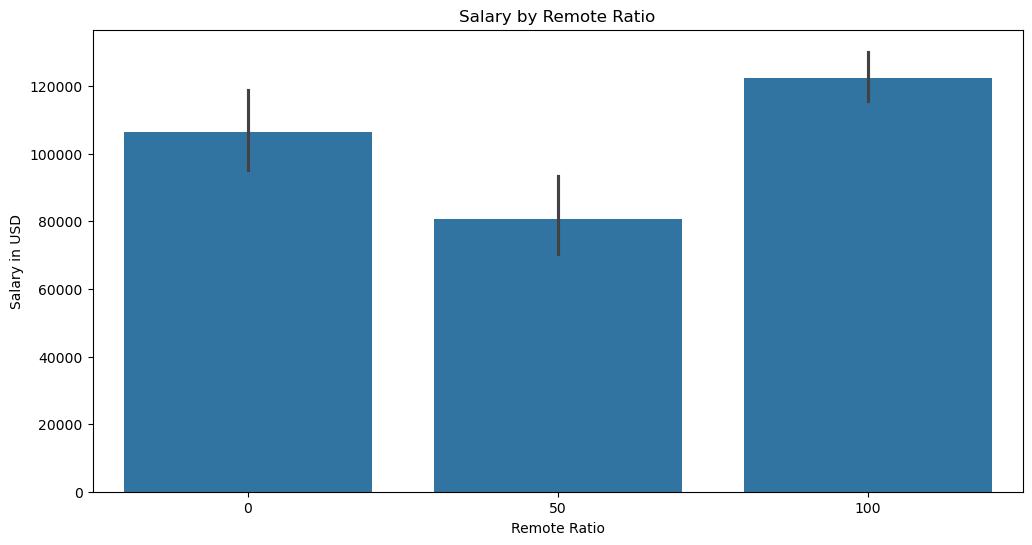

In [225]:
# Remote ratio vs salary
plt.figure(figsize=(12, 6))
sns.barplot(x='remote_ratio', y='salary_in_usd', data=data)
plt.title('Salary by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.show()

<h1> Financial Modeling</h1>
 Predict Salary Using Linear Regression <p>
 1. Train a model to predict salary_in_usd based on features like
 experience_level, job_title, etc.<p>
 2. Split data into training and testing sets

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [227]:
# Select features and target
features = ['experience_level', 'employment_type','remote_ratio', 'company_size']
target = 'salary_in_usd'

In [228]:
# Encode categorical columns for model
data = pd.get_dummies(data, columns=features, drop_first=True)

In [229]:
X = data.drop(columns=['salary_in_usd', 'work_year','employee_residence'])
y = data['salary_in_usd']

In [230]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [231]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [232]:
 # Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [233]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 2347856373.9149
Mean Absolute Error: 33556.459754200994


<h1>Data Visualization for Insights</h1>
 Interactive Dashboards with Streamlit <p>
 Build an interactive dashboard to visualize salary trends.

In [235]:
import streamlit as st
st.title('Data Science Job Salaries')
# Upload summary statistics
st.write(data.describe())
# Visualization
st.line_chart(data['salary_in_usd'])
# Filter by job title
job_filter = st.selectbox('Select Job Title',data['job_title'].unique())
filtered_data = data[data['job_title'] == job_filter]
st.bar_chart(filtered_data['salary_in_usd'])

DeltaGenerator()

In [236]:
!pip install streamlit


In [242]:
%%writefile app.py
import streamlit as st
import pandas as pd

# Load your data here
data = pd.read_csv('')  # Provide the correct path to your data file

st.title('Data Science Job Salaries')

# Upload summary statistics
st.write(data.describe())

# Visualization
st.line_chart(data['salary_in_usd'])

# Filter by job title
job_filter = st.selectbox('Select Job Title', data['job_title'].unique())
filtered_data = data[data['job_title'] == job_filter]
st.bar_chart(filtered_data['salary_in_usd'])


Overwriting app.py


In [243]:
!streamlit run app.py


^C
